# Code for CASE STUDY

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Exploratory data analysis

## 1.1 The Customer data

### Import the data as a dataframe and check for the head() and and info 


In [2]:
df_customer=pd.read_csv('CustomerData.txt',sep='|')

In [3]:
df_customer.head()

,USERID,GENDER,DOB,COUNTRY,EDUCATION,HOBBY
0,39060,F,1982-09-18,Ethiopia,,Laser tag
1,26050,M,1988-11-22,United Arab Emirates,,Ultra running
2,48580,M,1975-12-06,Martinique,Bachelor,Pottery
3,40220,F,1984-11-16,Germany,Master,Pottery
4,25160,M,1977-12-05,Madagascar,Master,Hamsters


In [4]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   USERID     574 non-null    int64 
 1   GENDER     574 non-null    object
 2   DOB        574 non-null    object
 3   COUNTRY    574 non-null    object
 4   EDUCATION  574 non-null    object
 5   HOBBY      574 non-null    object
dtypes: int64(1), object(5)
memory usage: 27.0+ KB


### Total number of customers

In [5]:
df_customer['USERID'].nunique()

574

### The number of customer by COUNTRY

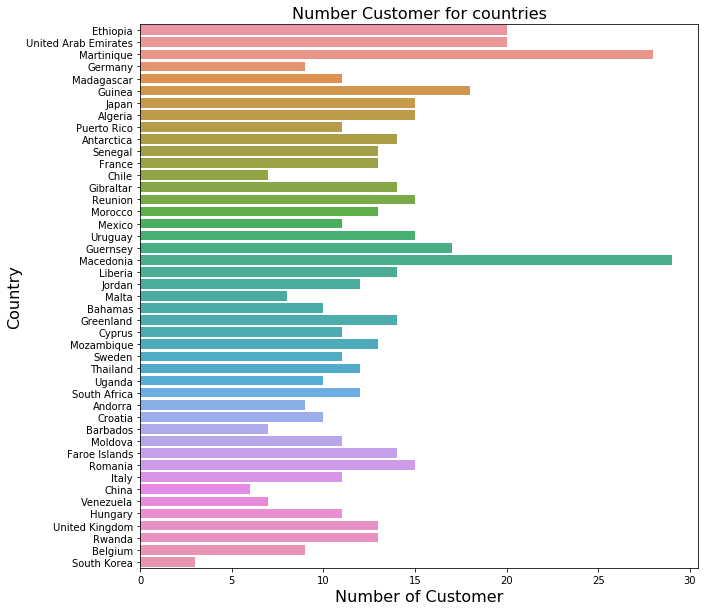

In [6]:
plt.figure(figsize=(10,10))
ax=sns.countplot(data=df_customer,y='COUNTRY')
plt.title('Number Customer for countries',fontsize=16)
plt.xlabel('Number of Customer',fontsize=16)
plt.ylabel('Country',fontsize=16)
plt.savefig("fig_1.1.png", dpi=100)

### The number of customers by HOBBY

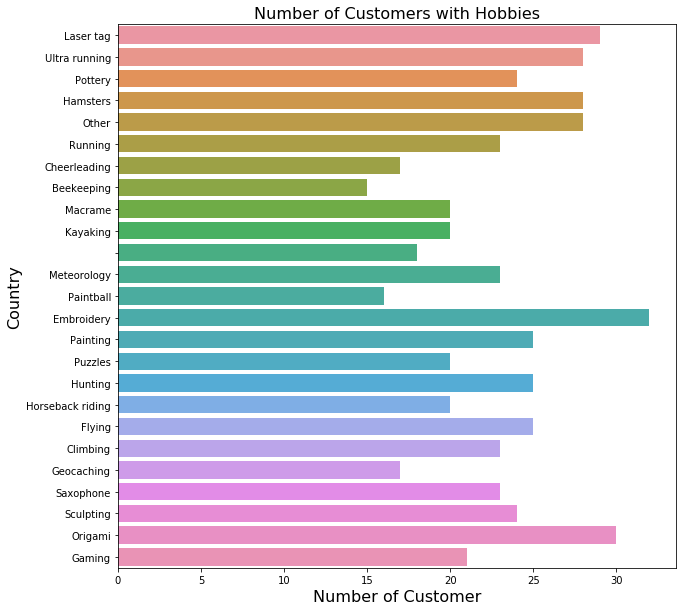

In [7]:
# Plot the number of customer for each country
plt.figure(figsize=(10,10))
ax=sns.countplot(data=df_customer,y='HOBBY')
plt.title('Number of Customers with Hobbies',fontsize=16)
plt.xlabel('Number of Customer',fontsize=16)
plt.ylabel('Country',fontsize=16)
plt.savefig("fig_1.1.png", dpi=100)

###  A pie chart shows the education of the customers

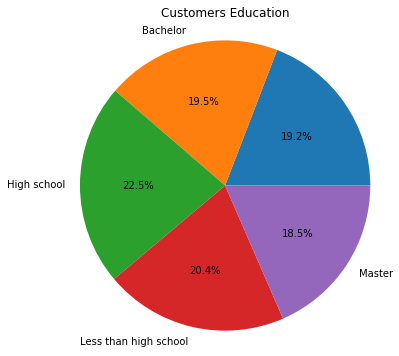

In [8]:
plt.figure(figsize=(6,6))
plt.title('Customers Education')
df=df_customer.groupby('EDUCATION').count().reset_index()
plt.pie(df['USERID'],labels=df['EDUCATION'],autopct='%1.1f%%')
plt.axis('equal')
plt.show()

### The customer gender


In [9]:
df_customer['GENDER'].unique()

array(['F', 'M', 'N'], dtype=object)

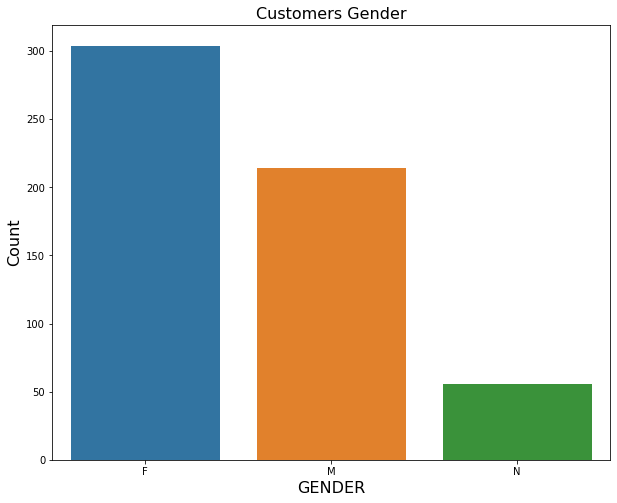

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(data=df_customer,x='GENDER')
plt.title('Customers Gender',fontsize=16)
plt.xlabel('GENDER',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.savefig("fig_1.3.png", dpi=100)

### Age distribution of the customers

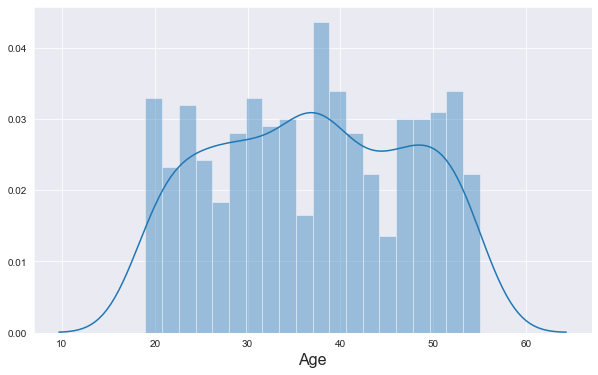

In [11]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

df_customer['DOB'] = pd.to_datetime(df_customer['DOB'])

# create year of birth column
df_customer['YOB']=pd.to_datetime(df_customer['DOB']).dt.year
sns.distplot(2020-df_customer['YOB'],bins=20)
#plt.title('Distribution of year of birth',fontsize=16)
plt.xlabel('Age',fontsize=16)
plt.savefig("fig_1.4.png", dpi=100)

## 1.2 The Item data

###  import the database as  a dataframe and check for the head() and the info()

In [12]:
df_item=pd.read_csv('ItemData.txt',sep='|')

In [13]:
df_item.head()

,ITEM,CATEGORY,COLOR,SUPLID,PURCHASEPRICE,SALEPRICE
0,127521,PAJAMAS,PINK,41560EE,1867.09,2800.0
1,151662,SOCKS,GOLD,16091ZZ,1862.08,2050.0
2,453756,COAT,GOLD,11370LL,914.81,1370.0
3,434386,PAJAMAS,SILVER,41560EE,1913,1430.0
4,422712,DRESS,SILVER,48094JJ,851.43,940.0


In [14]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2188800 entries, 0 to 2188799
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ITEM           int64  
 1   CATEGORY       object 
 2   COLOR          object 
 3   SUPLID         object 
 4   PURCHASEPRICE  object 
 5   SALEPRICE      float64
dtypes: float64(1), int64(1), object(4)
memory usage: 100.2+ MB


### Change the data type of the  "PURCHASEPRICE" column to float 

In [15]:
df_item['PURCHASEPRICE'] = pd.to_numeric(df_item['PURCHASEPRICE'],errors='coerce')

###  Check for the dudplicated rows in the dataframe

In [16]:
df_item[df_item[["ITEM"]].duplicated()]

,ITEM,CATEGORY,COLOR,SUPLID,PURCHASEPRICE,SALEPRICE
10944,127521,PAJAMAS,PINK,18767GG,1867.09,2800.0
10945,151662,SOCKS,GOLD,,1862.08,2050.0
10946,453756,COAT,GOLD,,914.81,1370.0
10947,434386,PAJAMAS,SILVER,48094CC,1913.00,1430.0
10948,422712,DRESS,SILVER,16091DD,851.43,940.0
...,...,...,...,...,...,...
2188795,130914,BELT,RAINBOW,42596PP,1118.81,1680.0
2188796,110127,SCARF,VIOLET,43136TT,1373.89,2060.0
2188797,224241,BELT,RAINBOW,16091DD,79.87,120.0
2188798,247888,DRESS,GOLD,13205GG,488.12,730.0


### There are 2177856 duplicated rows and we need to drop all the rows

In [17]:
df_item.drop_duplicates(keep='first',inplace=True)

### Now check for the number of the unique items and categories

In [18]:
df_item['ITEM'].nunique()

10944

In [19]:
df_item['CATEGORY'].unique()

array(['PAJAMAS', 'SOCKS', 'COAT', 'DRESS', 'SCARF', 'BELT', 'JACKET',
       'PANTS', 'HAT', 'GLOVES', 'TIE', 'SKIRT', 'STOCKINGS', 'SHIRT',
       'UNDERPANTS', 'JEANS', 'SUIT', 'SHOES'], dtype=object)

### Number of the items at different categories and colors

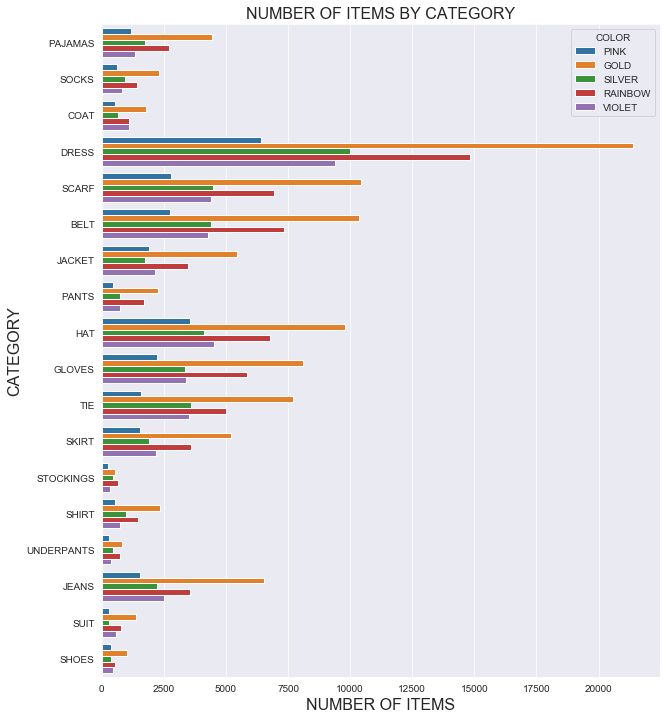

In [20]:
plt.figure(figsize=(10,12))
sns.countplot(data=df_item,y='CATEGORY',hue="COLOR")

plt.title('NUMBER OF ITEMS BY CATEGORY',fontsize=16)
plt.xlabel('NUMBER OF ITEMS',fontsize=16)
plt.ylabel('CATEGORY',fontsize=16)
plt.savefig("fig_2.1.png", dpi=100)

###  The number of items by "SUPLID"

In [21]:
df_item.groupby("SUPLID").count()["ITEM"]

SUPLID
           10940
11370LL    10940
11370TT    10937
13205GG    10939
13205VV    10937
14656DD    10937
14656UU    10937
16091DD    10937
16091ZZ    10937
18767CC    10940
18767GG    10938
41560EE    10935
41560GG    10940
41560MM    10941
42258KK    10940
42258WW    10939
42596PP    10933
42596VV    10935
43136JJ    10936
43136TT    10939
46396EE    10939
46396XX    10933
46848AA    10937
46848VV    10940
48094CC    10940
48094JJ    10944
Name: ITEM, dtype: int64

The numbers of items by "SUPLID" are almost the same!

### The SALEPRICE distribution of the items

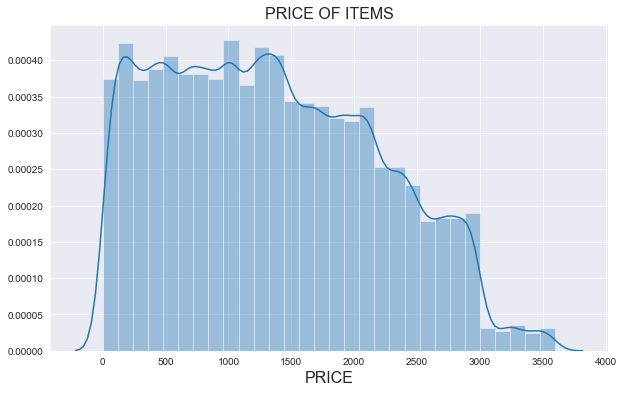

In [22]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.distplot(df_item['SALEPRICE'],bins=30)

plt.title('PRICE OF ITEMS',fontsize=16)
plt.xlabel('PRICE',fontsize=16)
plt.savefig("fig_2.3.png", dpi=100)

### There are many items having the SALEPRICE less than PURCHASEPRICE. We now create a new column called PROFIT showing the difference of the prices. 

Check for the ITEMS, CATEGORY with negative PROFIT (PURCHASEPRICE higher than SALEPRICE) to give an answer for the question: What is the maximum nagative PROFIT when the company sells an item of each category?

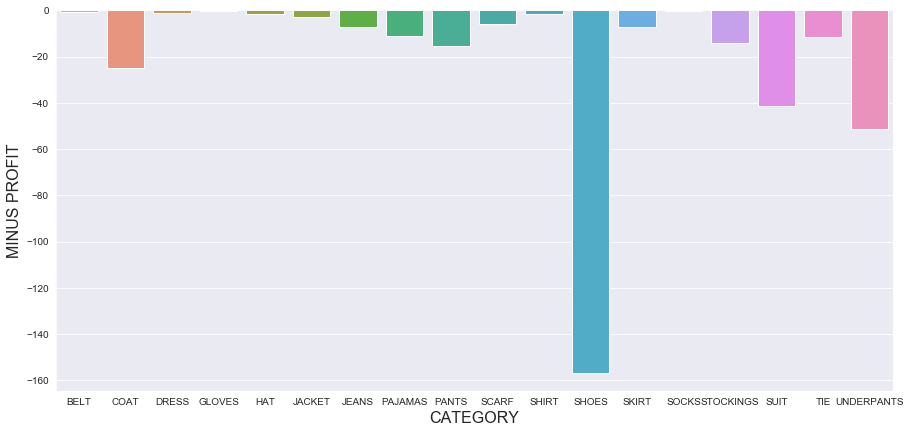

In [23]:
# Create a column called PROFIT by subtracting PURCHASEPRICE from SALEPRICE
df_item['PROFIT'] = df_item['SALEPRICE'] - df_item['PURCHASEPRICE']

# Create the a new data frame with PROFIT < 0 
df_item_minus = df_item[df_item['PROFIT']<0]

# Groupby CATEGORY  
df_category = df_item_minus[['CATEGORY','PROFIT']].groupby('CATEGORY').max()
df_category.reset_index(inplace=True)

# Plot the minus PROFIT
plt.figure(figsize=(15,7))
sns.barplot(data=df_category,x='CATEGORY',y='PROFIT')
#sns.set(font_scale = 1)

plt.xlabel('CATEGORY',fontsize=16)
plt.ylabel('MINUS PROFIT',fontsize=16)
plt.savefig("fig_2.4.png", dpi=100)

This plot shows that the company made a huge nagative profit when selling SHOES. 

Here we do the same calulation by for the maximum positve PROFIT when the company sells an item of each category.

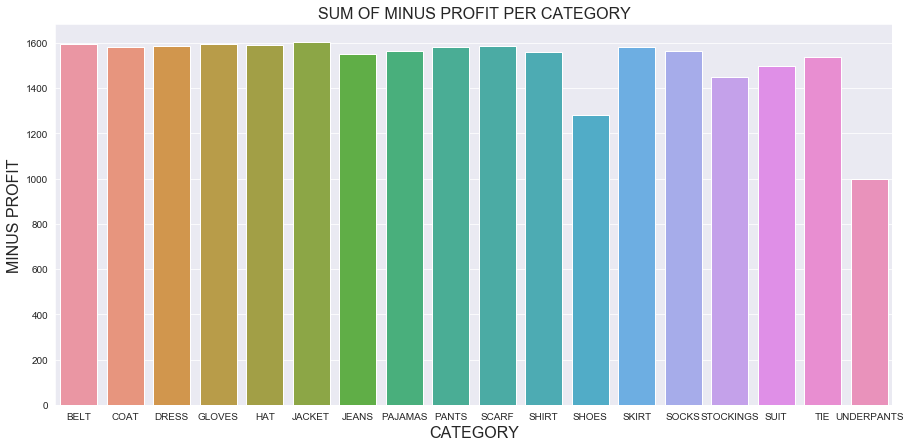

In [24]:
# Create the a new data frame with PROFIT > 0 
df_item_positive = df_item[df_item['PROFIT']>0]

# Groupby CATEGORY  
df_category = df_item_positive[['CATEGORY','PROFIT']].groupby('CATEGORY').max()
df_category.reset_index(inplace=True)

# Plot the minus PROFIT
plt.figure(figsize=(15,7))
sns.barplot(data=df_category,x='CATEGORY',y='PROFIT')
#sns.set(font_scale = 1)

plt.title('SUM OF MINUS PROFIT PER CATEGORY',fontsize=16)
plt.xlabel('CATEGORY',fontsize=16)
plt.ylabel('MINUS PROFIT',fontsize=16)
plt.savefig("fig_2.4.png", dpi=100)

## 1.3. The transaction data

###  import the database as  a dataframe and check for the head(), the info(), and the duplicated rows

In [25]:
# Import the data base as a datafram and check the head
df_trans = pd.read_csv('TransactionsData.txt',sep='|')
df_trans.head()

/Users/lamdoan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,USERID,WEBBROWSER,PPC_ADD,ITEM,PURCHASE,QTY,DISCOUNT,PAYMENT,WAREHOUSE,SHIPDAYS,DELIVERYDATE,REVIEW,RATING,TRACKNO,TIMESTAMP
0,15410,CHROME,KEVIN,309261,YES,4,28,APPLE PAY,D,6,2018-5-25,NO,1,348721,21:54:45
1,33510,EXPLORER,SENDI,484592,YES,4,30,,D,5,2018-5-1,NO,4,373987,5:44:25
2,26390,MOBILEAPP,KEVIN,191104,YES,2,4,,B,7,2018-7-7,YES,,421013,6:58:15
3,48580,MOBILEAPP,SENDI,124180,YES,3,29,AMEX,E,5,2018-2-13,NO,3,406643,12:50:23
4,14600,MOBILEAPP,KEVIN,223591,YES,,7,APPLE PAY,B,6,2018-1-10,NO,,365623,5:23:37


In [26]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2188800 entries, 0 to 2188799
Data columns (total 15 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   USERID        object
 1   WEBBROWSER    object
 2   PPC_ADD       object
 3   ITEM          int64 
 4   PURCHASE      object
 5   QTY           object
 6   DISCOUNT      object
 7   PAYMENT       object
 8   WAREHOUSE     object
 9   SHIPDAYS      object
 10  DELIVERYDATE  object
 11  REVIEW        object
 12  RATING        object
 13  TRACKNO       object
 14  TIMESTAMP     object
dtypes: int64(1), object(14)
memory usage: 250.5+ MB


### Check for the payment methods used by the customers

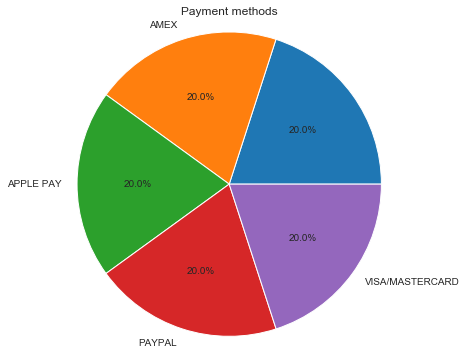

In [27]:
plt.figure(figsize=(6,6))
plt.title('Payment methods')
df=df_trans.groupby('PAYMENT').count().reset_index()
plt.pie(df['ITEM'],labels=df['PAYMENT'],autopct='%1.1f%%')
plt.axis('equal')
plt.show()

With more than 2 millions transaction and they are equally distributed in the different payment methods. This is seemingly odd.

### Check for the distribution of TRANSACTION by HOURs


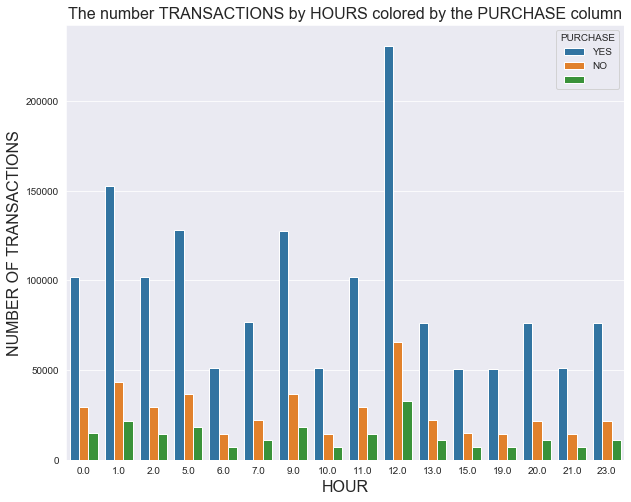

In [28]:
# Create 'Month' column from the 'Deliverydate' column

df_trans['MONTH']=df_trans['DELIVERYDATE'].str.split(pat='-',expand=True)[1]
df_trans['MONTH']=pd.to_numeric(df_trans['MONTH'],errors='coerce',downcast='integer')

# Create 'HOUR' column from the 'TIMESTAMP' column

df_trans['HOUR']=df_trans['TIMESTAMP'].str.split(pat=':',expand=True)[0]
df_trans['HOUR']=pd.to_numeric(df_trans['HOUR'],errors='coerce',downcast='integer')

plt.figure(figsize=(10,8))
plt.title('The number TRANSACTIONS by HOURS colored by the PURCHASE column',fontsize=16)

sns.countplot(x='HOUR',data=df_trans,hue='PURCHASE')
plt.ylabel('NUMBER OF TRANSACTIONS',fontsize=16)
plt.xlabel('HOUR',fontsize=16)
plt.savefig("fig_3.6.png", dpi=100)

### Percentage of customers giving review on the services

In [29]:
df=df_trans.groupby('REVIEW').count().reset_index()
df

,REVIEW,USERID,WEBBROWSER,PPC_ADD,ITEM,PURCHASE,QTY,DISCOUNT,PAYMENT,WAREHOUSE,SHIPDAYS,DELIVERYDATE,RATING,TRACKNO,TIMESTAMP,MONTH,HOUR
0,,219272,219272,219272,219272,219272,219272,219272,219272,219272,219272,219272,219272,219272,219272,211739,215634
1,NO,1093218,1093218,1093218,1093218,1093218,1093218,1093218,1093218,1093218,1093218,1093218,1093218,1093218,1093218,1055633,1074913
2,YES,876310,876310,876310,876310,876310,876310,876310,876310,876310,876310,876310,876310,876310,876310,845936,861598


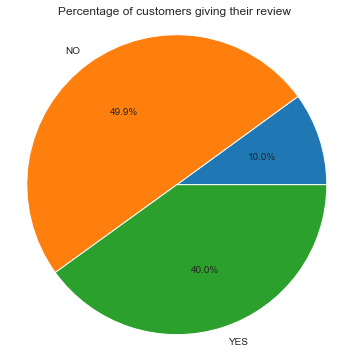

In [30]:
plt.figure(figsize=(6,6))
plt.title('Percentage of customers giving their review')
df=df_trans.groupby('REVIEW').count().reset_index()
plt.pie(df['USERID'],labels=df['REVIEW'],autopct='%1.1f%%')
plt.axis('equal')
plt.show()

### RATING counts

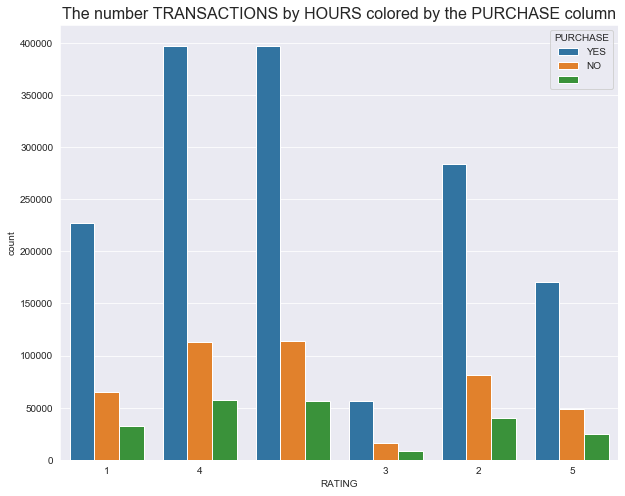

In [31]:
plt.figure(figsize=(10,8))
plt.title('The number TRANSACTIONS by HOURS colored by the PURCHASE column',fontsize=16)
sns.countplot(x='RATING',data=df_trans,hue="PURCHASE")

### Check for the most common WEBBROWSER used by the customers


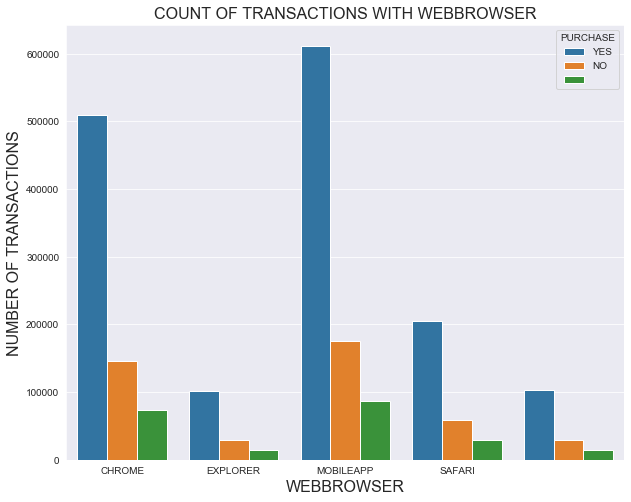

In [32]:
plt.figure(figsize=(10,8))
plt.title('COUNT OF TRANSACTIONS WITH WEBBROWSER',fontsize=16)

sns.countplot(x='WEBBROWSER',data=df_trans,hue='PURCHASE')
plt.ylabel('NUMBER OF TRANSACTIONS',fontsize=16)
plt.xlabel('WEBBROWSER',fontsize=16)
plt.savefig("fig_3.1.png", dpi=100)

### Shipdays

In [33]:
sorted(df_trans['SHIPDAYS'].unique())

[' ', '1', '10', '2', '3', '4', '5', '6', '7', '8']

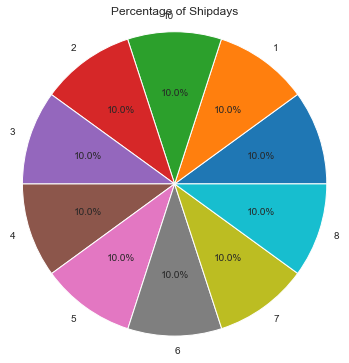

In [34]:
plt.figure(figsize=(6,6))
plt.title('Percentage of Shipdays')
df=df_trans.groupby('SHIPDAYS').count().reset_index()
plt.pie(df['USERID'],labels=df['SHIPDAYS'],autopct='%1.1f%%')
plt.axis('equal')
plt.show()

###  We now create a new database to calculate the profit. 
   1. Create a new copy of df_trans called df_trans_price included "USERID" and "ITEM" columns
   
   2. Map the profit (PROFIT column) per an item from the item dataframe to the newly created dataframe
   
   3. Calculate a "TOTAL" profit column by mutiplying the profit per an item with the number of the item ordered ("QTY" column). In case of empty value in the "QTY" column, the missing values are filled with 1.
   
   4. Copy the "PURCHASE", "PPC_ADD", "DISCOUNT" and "MONTH" columns from transaction dataframe to the newly created dataframe
   
   5. Create a columns called "MONTH"


In [35]:
# Create a new copy of df_trans called df_trans_price
df_trans_price = df_trans[['USERID','ITEM']]
df_trans_price['ITEM'] = df_trans_price['ITEM'].apply(str)

/Users/lamdoan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
# create a dataframe called df_item_price from df_item with two column: ITEM and PROFIT
df_item_price = df_item[['ITEM','PROFIT']]
df_item_price['ITEM'] = df_item_price['ITEM'].apply(str)


# convert the dataframe to a dictionary
dict_item_price = df_item_price.set_index('ITEM').to_dict()['PROFIT']

/Users/lamdoan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
# Mapping ITEM column by SALEPRICE column from df_item
df_trans_price['ITEM'] = df_trans_price['ITEM'].replace(dict_item_price)
df_trans_price=df_trans_price.rename(columns={"ITEM": "PROFIT"})

/Users/lamdoan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
# Copy 'QTY' column from the transaction table
df_trans_price['QTY'] = df_trans ['QTY']

# Fill empty value of 'QTY' with 1
df_trans_price['QTY'].replace(' ','1',inplace=True)

# Convert string type of 'QTY' and 'PROFIT' to numerical
df_trans_price['QTY'] = pd.to_numeric(df_trans_price['QTY'],downcast='integer')
df_trans_price['PROFIT'] = pd.to_numeric(df_trans_price['PROFIT'])


# Create a new column called TOTAL  by multiply PROFIT by QTY
df_trans_price['TOTAL'] = df_trans_price['PROFIT'] * df_trans_price['QTY']

In [39]:
# Copy 'PURCHASE' column from the transaction table
df_trans_price['PURCHASE'] = df_trans ['PURCHASE']

# Copy again the 'ITEM' column from the transaction table
df_trans_price['ITEM'] = df_trans ['ITEM']

In [40]:
# change the columns order
cols = df_trans_price.columns.tolist()
cols

['USERID', 'PROFIT', 'QTY', 'TOTAL', 'PURCHASE', 'ITEM']

In [41]:
cols = ['USERID', 'ITEM', 'PROFIT', 'QTY', 'TOTAL', 'PURCHASE']
df_trans_price = df_trans_price[cols]

In [42]:
df_trans_price['PPC_ADD'] = df_trans['PPC_ADD']
df_trans_price['DISCOUNT'] = df_trans['DISCOUNT']
df_trans_price['MONTH'] = df_trans['MONTH']
df_trans_price['RATING'] = df_trans['RATING']
df_trans_price['REVIEW'] = df_trans['REVIEW']
df_trans_price['MONTH'] = df_trans_price['MONTH'].astype(int,errors="ignore")

In [43]:
df_trans_price['RATING'] = df_trans['RATING']
df_trans_price['REVIEW'] = df_trans['REVIEW']
df_trans_price['RATING'] = pd.to_numeric(df_trans_price['RATING'],errors='ignore')

In [44]:
type(df_trans_price['RATING'][0])

str

In [45]:
df_trans_price.head()

,USERID,ITEM,PROFIT,QTY,TOTAL,PURCHASE,PPC_ADD,DISCOUNT,MONTH,RATING,REVIEW
0,15410,309261,177.68,4,710.72,YES,KEVIN,28,5.0,1,NO
1,33510,484592,469.10,4,1876.40,YES,SENDI,30,5.0,4,NO
2,26390,191104,664.31,2,1328.62,YES,KEVIN,4,7.0,,YES
3,48580,124180,333.95,3,1001.85,YES,SENDI,29,2.0,3,NO
4,14600,223591,853.44,1,853.44,YES,KEVIN,7,1.0,,NO


In [46]:
df_trans_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2188800 entries, 0 to 2188799
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   USERID    object 
 1   ITEM      int64  
 2   PROFIT    float64
 3   QTY       int8   
 4   TOTAL     float64
 5   PURCHASE  object 
 6   PPC_ADD   object 
 7   DISCOUNT  object 
 8   MONTH     float64
 9   RATING    object 
 10  REVIEW    object 
dtypes: float64(3), int64(1), int8(1), object(6)
memory usage: 169.1+ MB


In [47]:
df_trans_price.to_csv('trans_price.csv', index=False)

In [48]:
sorted(df_trans_price['MONTH'].unique())

[1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 10.0, 11.0, 12.0, nan]

### Calculate the total profit by MONTH

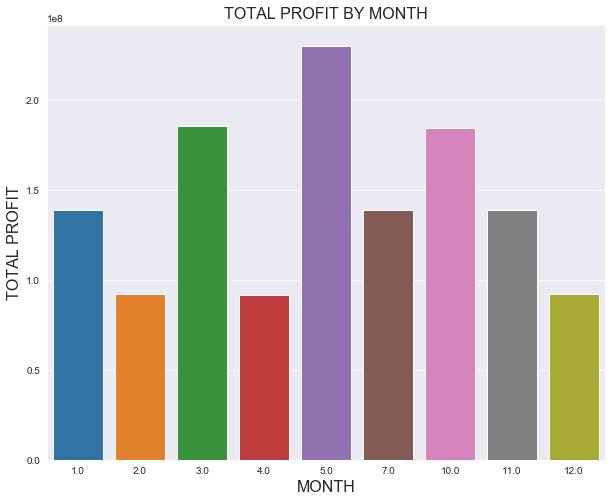

In [49]:
# groupby MONTH
df = df_trans_price[['MONTH','TOTAL']][df_trans_price['PURCHASE']=='YES'].groupby('MONTH').sum()
df = df.reset_index()


plt.figure(figsize=(10,8))
plt.title('TOTAL PROFIT BY MONTH',fontsize=16)

sns.barplot(x='MONTH',y='TOTAL',data=df)
plt.xlabel('MONTH',fontsize=16)
plt.ylabel('TOTAL PROFIT',fontsize=16)
plt.savefig("fig_3.11.png", dpi=100)

In [50]:
df_trans_price['ITEM']

0          309261
1          484592
2          191104
3          124180
4          223591
            ...  
2188795    387248
2188796    437259
2188797    204442
2188798    438793
2188799    271184
Name: ITEM, Length: 2188800, dtype: int64

### Calculate the total profit by CATEGORY for the hole year

In [51]:
# Groupby ITEM and apply count() funtion
df1 = df_trans_price[['TOTAL','ITEM']][df_trans_price['PURCHASE']=='YES'].groupby('ITEM').sum()
df1 = df1.reset_index()
df1['ITEM'] = df1['ITEM'].apply(str)

In [52]:
# create a dataframe called df_item_suplid from df_item with two column: ITEM and CATEGORY
df_item_cat = df_item[['ITEM','CATEGORY']]
df_item_cat['ITEM'] = df_item_cat['ITEM'].apply(str)
df_item_cat.drop_duplicates(keep='first',inplace=True)

# convert the dataframe to a dictionary
dict_item_cat = df_item_cat.set_index('ITEM').to_dict()['CATEGORY']

/Users/lamdoan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/lamdoan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [53]:
# Mapping USERID column by COUNTRY column from df_item
df1 = df1.replace(dict_item_cat)
df1.rename(columns={"ITEM": "CATEGORY"},inplace=True)

In [54]:
df1.head()

,CATEGORY,TOTAL
0,SCARF,-111261.60
1,DRESS,1956.40
2,DRESS,354550.72
3,GLOVES,-24306.85
4,SHIRT,-155149.02


In [55]:
# Group by CATEGORY
df1 = df1.groupby('CATEGORY').sum().reset_index()
df1.head()

,CATEGORY,TOTAL
0,BELT,1.233618e+08
1,COAT,2.688407e+07
2,DRESS,2.842373e+08
3,GLOVES,1.096553e+08
4,HAT,1.314296e+08


In [56]:
df1.to_csv('category_profit.csv', index=False)

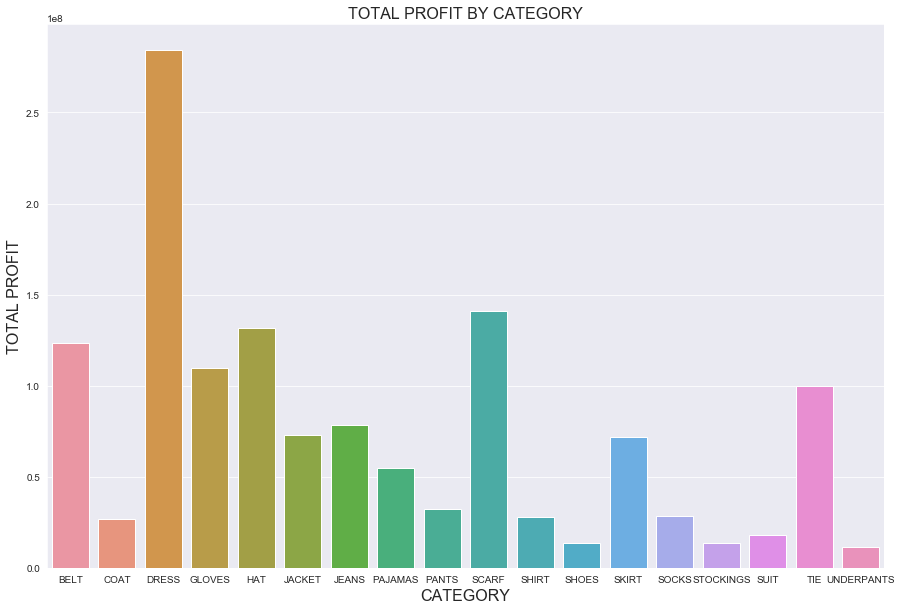

In [57]:
plt.figure(figsize=(15,10))
plt.title('TOTAL PROFIT BY CATEGORY',fontsize=16)

sns.barplot(y='TOTAL',x='CATEGORY',data=df1)
plt.ylabel('TOTAL PROFIT',fontsize=16)
plt.xlabel('CATEGORY',fontsize=16)
plt.savefig("fig_3.9.png", dpi=100)

### Calculate the total profit by COUNTRY

In [58]:
# Groupby ITEM and apply count() funtion
df2 = df_trans_price[['TOTAL','USERID']][df_trans_price['PURCHASE']=='YES'].groupby('USERID').sum()
df2 = df2.reset_index()
df2['USERID'] = df2['USERID'].apply(str)

In [59]:
# create a dataframe called df_user_country from df_item with two column: USERID and COUNTRY
df_user_country = df_customer[['USERID','COUNTRY']]
df_user_country['USERID'] = df_user_country['USERID'].apply(str)

# convert the dataframe to a dictionary
dict_user_country = df_user_country.set_index('USERID').to_dict()['COUNTRY']

/Users/lamdoan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
# Mapping USERID column by COUNTRY column
df2 = df2.replace(dict_user_country)
df2.rename(columns={"USERID": "COUNTRY"},inplace=True)
df2.head()

,COUNTRY,TOTAL
0,,2351808.93
1,Guinea,2347900.98
2,Greenland,2422639.71
3,Guernsey,2343953.73
4,United Arab Emirates,2362910.12


In [61]:
# Groupby SUPLID column and apply sum()
df2 = df2.groupby('COUNTRY').sum()
df2 = df2.reset_index()
df2.head()

,COUNTRY,TOTAL
0,,2351808.93
1,Algeria,35074346.10
2,Andorra,21116434.74
3,Antarctica,32630297.27
4,Bahamas,23327074.55


In [64]:
df2.to_csv('country_profit.csv', index=False)

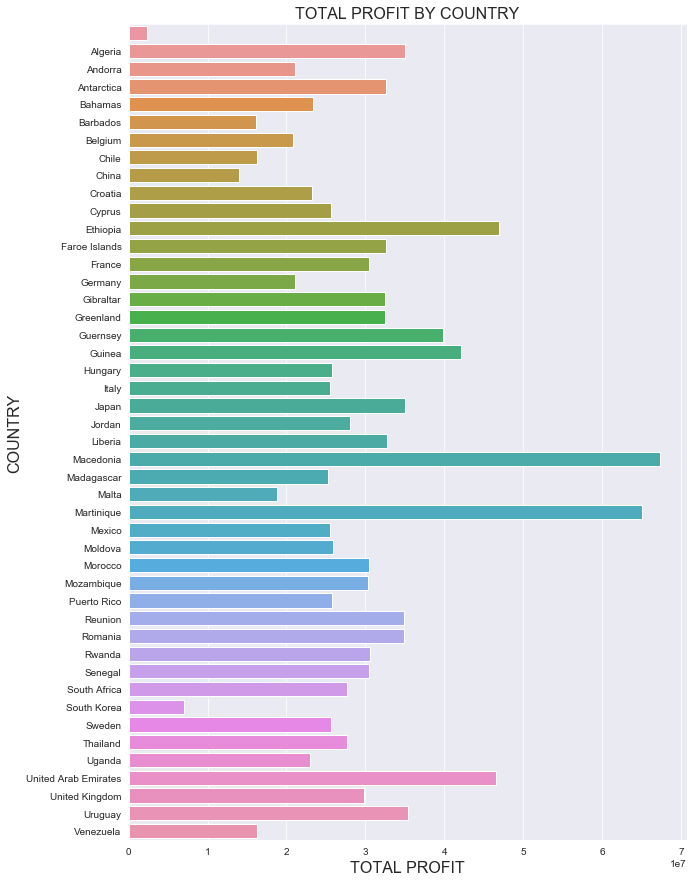

In [65]:
plt.figure(figsize=(10,15))
plt.title('TOTAL PROFIT BY COUNTRY',fontsize=16)

sns.barplot(x='TOTAL',y='COUNTRY',data=df2)
plt.xlabel('TOTAL PROFIT',fontsize=16)
plt.ylabel('COUNTRY',fontsize=16)
plt.savefig("fig_3.10.png", dpi=100)

### Count the number of order items at each CATEGORY

In [66]:
df_trans_price.head()

,USERID,ITEM,PROFIT,QTY,TOTAL,PURCHASE,PPC_ADD,DISCOUNT,MONTH,RATING,REVIEW
0,15410,309261,177.68,4,710.72,YES,KEVIN,28,5.0,1,NO
1,33510,484592,469.10,4,1876.40,YES,SENDI,30,5.0,4,NO
2,26390,191104,664.31,2,1328.62,YES,KEVIN,4,7.0,,YES
3,48580,124180,333.95,3,1001.85,YES,SENDI,29,2.0,3,NO
4,14600,223591,853.44,1,853.44,YES,KEVIN,7,1.0,,NO


In [67]:
# create a dataframe called df_item_suplid from df_item with two column: ITEM and suplid
df_ic = df_item[['ITEM','CATEGORY']]
df_ic['ITEM'] = df_ic['ITEM'].apply(str)
df_ic.drop_duplicates(keep='first',inplace=True)

# convert the dataframe to a dictionary
dict_ic= df_ic.set_index('ITEM').to_dict()['CATEGORY']

/Users/lamdoan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/lamdoan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [68]:
df=df_trans[['PURCHASE','ITEM']]
df['ITEM'] = df['ITEM'].apply(str)
# Mapping USERID column by COUNTRY column from df_item
df= df.replace(dict_ic)

/Users/lamdoan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [69]:
df.rename(columns={"ITEM": "CATEGORY"},inplace=True)

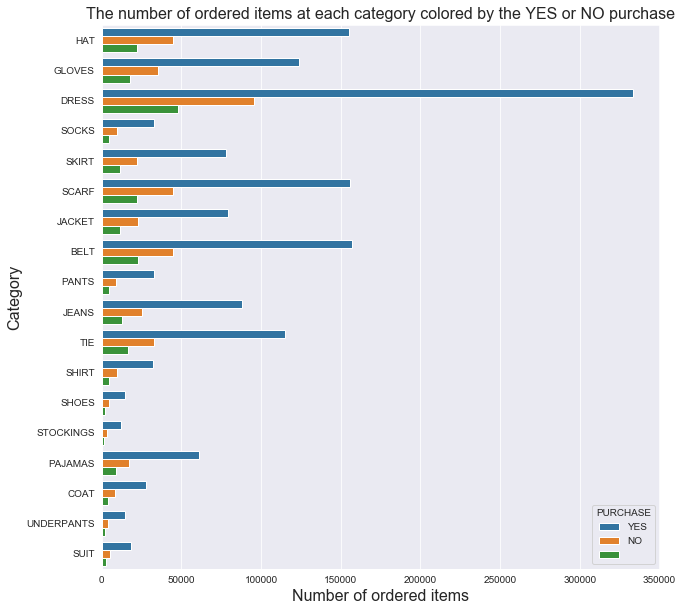

In [70]:
plt.figure(figsize=(10,10))
sns.countplot(y='CATEGORY',data=df,hue='PURCHASE')

plt.title('The number of ordered items at each category colored by the YES or NO purchase',fontsize=16)
plt.xlabel('Number of ordered items',fontsize=16)
plt.ylabel('Category',fontsize=16)
plt.savefig("fig_3.10.png", dpi=100)

### Number of transcation with each PPC_ADD

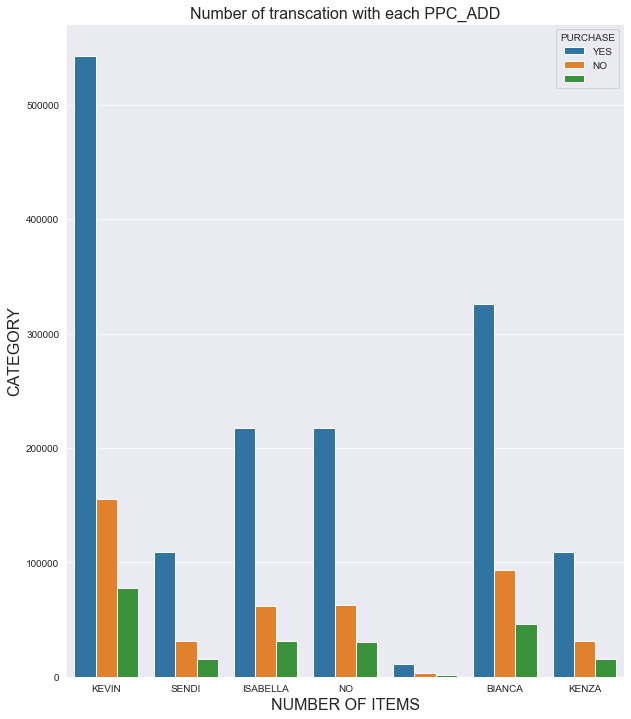

In [71]:
plt.figure(figsize=(10,12))
sns.countplot(data=df_trans_price,x='PPC_ADD',hue="PURCHASE")

plt.title('Number of transcation with each PPC_ADD',fontsize=16)
plt.xlabel('NUMBER OF ITEMS',fontsize=16)
plt.ylabel('CATEGORY',fontsize=16)
plt.savefig("fig_2.1.png", dpi=100)

# 2. Using Support Vector Machines method to make a model predicting if the transaction has YES or NO status in the PURCHASE column

In [72]:
df_trans_price.head()

,USERID,ITEM,PROFIT,QTY,TOTAL,PURCHASE,PPC_ADD,DISCOUNT,MONTH,RATING,REVIEW
0,15410,309261,177.68,4,710.72,YES,KEVIN,28,5.0,1,NO
1,33510,484592,469.10,4,1876.40,YES,SENDI,30,5.0,4,NO
2,26390,191104,664.31,2,1328.62,YES,KEVIN,4,7.0,,YES
3,48580,124180,333.95,3,1001.85,YES,SENDI,29,2.0,3,NO
4,14600,223591,853.44,1,853.44,YES,KEVIN,7,1.0,,NO


In [73]:
df_trans_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2188800 entries, 0 to 2188799
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   USERID    object 
 1   ITEM      int64  
 2   PROFIT    float64
 3   QTY       int8   
 4   TOTAL     float64
 5   PURCHASE  object 
 6   PPC_ADD   object 
 7   DISCOUNT  object 
 8   MONTH     float64
 9   RATING    object 
 10  REVIEW    object 
dtypes: float64(3), int64(1), int8(1), object(6)
memory usage: 169.1+ MB


## 2.1 Preprocessing data for the model

### Create a new dataframe


In [74]:
# create a new dataframe
df=df_trans_price.drop(['USERID','ITEM','PROFIT'],axis=1)
df.head()

,QTY,TOTAL,PURCHASE,PPC_ADD,DISCOUNT,MONTH,RATING,REVIEW
0,4,710.72,YES,KEVIN,28,5.0,1,NO
1,4,1876.40,YES,SENDI,30,5.0,4,NO
2,2,1328.62,YES,KEVIN,4,7.0,,YES
3,3,1001.85,YES,SENDI,29,2.0,3,NO
4,1,853.44,YES,KEVIN,7,1.0,,NO


### Drop the rows with empty cells

In [75]:
# Drop the rows with empty cells
import numpy as np
df = df.replace(' ', np.nan)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1246631 entries, 0 to 2188795
Data columns (total 8 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   QTY       1246631 non-null  int8   
 1   TOTAL     1246631 non-null  float64
 2   PURCHASE  1246631 non-null  object 
 3   PPC_ADD   1246631 non-null  object 
 4   DISCOUNT  1246631 non-null  object 
 5   MONTH     1246631 non-null  float64
 6   RATING    1246631 non-null  object 
 7   REVIEW    1246631 non-null  object 
dtypes: float64(2), int8(1), object(5)
memory usage: 77.3+ MB


### Split the PPC_ADD comumn into multiple dummy variables

In [76]:
brach_column=pd.get_dummies(df['PPC_ADD'])
brach_column

,BIANCA,ISABELLA,KENZA,KEVIN,NO,SENDI
0,0,0,0,1,0,0
1,0,0,0,0,0,1
3,0,0,0,0,0,1
5,0,1,0,0,0,0
6,0,1,0,0,0,0
...,...,...,...,...,...,...
2188787,1,0,0,0,0,0
2188788,0,0,0,0,0,1
2188789,0,0,0,0,1,0
2188792,0,0,0,0,1,0


In [77]:
# Concate to the dummy variables to df
df=pd.concat([df, brach_column], axis=1)
df.head()

,QTY,TOTAL,PURCHASE,PPC_ADD,DISCOUNT,MONTH,RATING,REVIEW,BIANCA,ISABELLA,KENZA,KEVIN,NO,SENDI
0,4,710.72,YES,KEVIN,28,5.0,1,NO,0,0,0,1,0,0
1,4,1876.40,YES,SENDI,30,5.0,4,NO,0,0,0,0,0,1
3,3,1001.85,YES,SENDI,29,2.0,3,NO,0,0,0,0,0,1
5,2,1067.22,YES,ISABELLA,4,7.0,4,YES,0,1,0,0,0,0
6,2,74.26,YES,ISABELLA,11,11.0,2,YES,0,1,0,0,0,0


In [78]:
# drop the original PPC_ADD column
df = df.drop('PPC_ADD',axis=1)

In [79]:
df['RATING'] = pd.to_numeric(df['RATING'])
df['DISCOUNT'] = pd.to_numeric(df['DISCOUNT'])

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1246631 entries, 0 to 2188795
Data columns (total 13 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   QTY       1246631 non-null  int8   
 1   TOTAL     1246631 non-null  float64
 2   PURCHASE  1246631 non-null  object 
 3   DISCOUNT  1246631 non-null  int64  
 4   MONTH     1246631 non-null  float64
 5   RATING    1246631 non-null  int64  
 6   REVIEW    1246631 non-null  object 
 7   BIANCA    1246631 non-null  uint8  
 8   ISABELLA  1246631 non-null  uint8  
 9   KENZA     1246631 non-null  uint8  
 10  KEVIN     1246631 non-null  uint8  
 11  NO        1246631 non-null  uint8  
 12  SENDI     1246631 non-null  uint8  
dtypes: float64(2), int64(2), int8(1), object(2), uint8(6)
memory usage: 74.9+ MB


### Turn the data from the 'REVIEW' and 'PURCHASE' column into binary data, by mapping the value of 0 to  'NO', and the value of 1 to 'YES' in this column

In [81]:
df['REVIEW']=df['REVIEW'].map({'NO':0,'YES':1})

In [82]:
df['PURCHASE']=df['PURCHASE'].map({'NO':0,'YES':1})

In [83]:
df.head()

,QTY,TOTAL,PURCHASE,DISCOUNT,MONTH,RATING,REVIEW,BIANCA,ISABELLA,KENZA,KEVIN,NO,SENDI
0,4,710.72,1,28,5.0,1,0,0,0,0,1,0,0
1,4,1876.40,1,30,5.0,4,0,0,0,0,0,0,1
3,3,1001.85,1,29,2.0,3,0,0,0,0,0,0,1
5,2,1067.22,1,4,7.0,4,1,0,1,0,0,0,0
6,2,74.26,1,11,11.0,2,1,0,1,0,0,0,0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1246631 entries, 0 to 2188795
Data columns (total 13 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   QTY       1246631 non-null  int8   
 1   TOTAL     1246631 non-null  float64
 2   PURCHASE  1246631 non-null  int64  
 3   DISCOUNT  1246631 non-null  int64  
 4   MONTH     1246631 non-null  float64
 5   RATING    1246631 non-null  int64  
 6   REVIEW    1246631 non-null  int64  
 7   BIANCA    1246631 non-null  uint8  
 8   ISABELLA  1246631 non-null  uint8  
 9   KENZA     1246631 non-null  uint8  
 10  KEVIN     1246631 non-null  uint8  
 11  NO        1246631 non-null  uint8  
 12  SENDI     1246631 non-null  uint8  
dtypes: float64(2), int64(4), int8(1), uint8(6)
memory usage: 74.9 MB


### Reorder the columns

In [85]:
df.columns.values

array(['QTY', 'TOTAL', 'PURCHASE', 'DISCOUNT', 'MONTH', 'RATING',
       'REVIEW', 'BIANCA', 'ISABELLA', 'KENZA', 'KEVIN', 'NO', 'SENDI'],
      dtype=object)

In [86]:
df=df[['QTY', 'TOTAL', 'DISCOUNT', 'MONTH', 'RATING',
       'REVIEW', 'BIANCA', 'ISABELLA', 'KENZA', 'KEVIN', 'NO', 'SENDI', 'PURCHASE']]

In [87]:
df.head()

,QTY,TOTAL,DISCOUNT,MONTH,RATING,REVIEW,BIANCA,ISABELLA,KENZA,KEVIN,NO,SENDI,PURCHASE
0,4,710.72,28,5.0,1,0,0,0,0,1,0,0,1
1,4,1876.40,30,5.0,4,0,0,0,0,0,0,1,1
3,3,1001.85,29,2.0,3,0,0,0,0,0,0,1,1
5,2,1067.22,4,7.0,4,1,0,1,0,0,0,0,1
6,2,74.26,11,11.0,2,1,0,1,0,0,0,0,1


### 2.2. Split the data to Train and Test set

### Take a random sample of the big dataframe
There are quite alot of observations (rows) in the dataframe df. To optimise the time cosuming to train the model, the model will be trained with a random sample of the dataframe df

In [88]:
# Select a random sample of 5% of the df dataframe
df_m = df.sample(frac=0.007, replace=False)
df_m.reset_index(inplace=True,drop=True)
df_m

,QTY,TOTAL,DISCOUNT,MONTH,RATING,REVIEW,BIANCA,ISABELLA,KENZA,KEVIN,NO,SENDI,PURCHASE
0,4,458.32,6,5.0,1,1,0,0,0,0,0,1,1
1,4,328.20,8,7.0,2,1,1,0,0,0,0,0,1
2,2,530.30,6,1.0,5,0,0,1,0,0,0,0,0
3,2,92.36,8,7.0,2,1,0,0,0,0,1,0,0
4,2,1169.38,18,7.0,5,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8721,3,-372.75,2,7.0,5,0,0,1,0,0,0,0,1
8722,3,367.35,6,11.0,5,0,0,0,0,1,0,0,1
8723,1,496.72,24,3.0,2,0,1,0,0,0,0,0,0
8724,1,270.04,30,12.0,2,0,0,0,0,1,0,0,1


### Split the model dataframe in to Train and Test set

In [89]:
X = df_m.drop('PURCHASE',axis=1)
y = np.ravel(df_m['PURCHASE'])

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## 2.3. Train the SVM model

In [92]:
# Train the Support Vector Classifier
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## 2.4. Predictions and Evaluations

Now let's predict using the trained model

### Confusion_matrix

In [93]:
predictions = model.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[   0  575]
 [   0 2043]]


### Classification_report

In [94]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       575
           1       0.78      1.00      0.88      2043

    accuracy                           0.78      2618
   macro avg       0.39      0.50      0.44      2618
weighted avg       0.61      0.78      0.68      2618



/Users/lamdoan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2.5. Using a built-in function called GridSearchCV to find the best input parameter for the model

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [97]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [98]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=0.1, gamma=1, score=0.782, total=   1.2s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.782, total=   1.0s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.782, total=   0.9s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.782, total=   1.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.782, total=   1.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.782, total=   1.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.782, total=   1.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.782, total=   1.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.782, total=   1.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] .................... C=10, gamma=0.01, score=0.682, total=   1.4s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.692, total=   1.2s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.695, total=   1.3s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.692, total=   1.4s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.709, total=   1.4s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.775, total=   2.6s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.767, total=   2.7s
[CV] C=10, gamma=0.001 ...............................................
[CV] .

[CV] ................. C=1000, gamma=0.001, score=0.696, total=  13.9s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................. C=1000, gamma=0.001, score=0.686, total=17.7min
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.776, total=41.4min
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.771, total= 1.7min
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.769, total= 2.1min
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.778, total= 1.5min
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.779, total= 2.8min


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 73.2min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [99]:
grid.best_params_

{'C': 0.1, 'gamma': 1}

In [100]:
grid.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [101]:
grid_predictions = grid.predict(X_test)

## Evaluation

In [102]:
print(confusion_matrix(y_test,grid_predictions))

[[   0  575]
 [   0 2043]]


In [103]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       575
           1       0.78      1.00      0.88      2043

    accuracy                           0.78      2618
   macro avg       0.39      0.50      0.44      2618
weighted avg       0.61      0.78      0.68      2618



/Users/lamdoan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 3. Using Logistic regression method to make a model predicting if the transaction has YES or NO status in the PURCHASE column

## Training and Predicting

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

/Users/lamdoan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
log_predictions = log_model.predict(X_test)

## Evaluation

In [107]:
print(confusion_matrix(y_test,log_predictions))

[[   0  575]
 [   0 2043]]


In [108]:
print(classification_report(y_test,log_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       575
           1       0.78      1.00      0.88      2043

    accuracy                           0.78      2618
   macro avg       0.39      0.50      0.44      2618
weighted avg       0.61      0.78      0.68      2618



/Users/lamdoan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
